# Color Threshold, Blue Screen

### 1. Import resources and libraries 

In [9]:
import matplotlib.pyplot as plt # For plotting 
import numpy as np
import cv2 # Computer vision library OpenCV

%matplotlib inline

### 2. Read in and display the image

In [10]:
# Read in the image
image = cv2.imread('/Users/fadhlihajar/Desktop/BlueScreen .png')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (648, 800, 3)


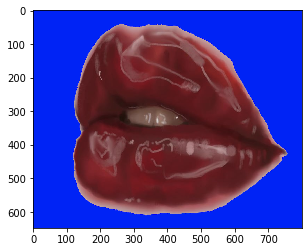

In [11]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR) لانه يستخدم في الاوبن سيفي صيغة بي جي ار
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### 3. Define the color threshold

In [12]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,220]) # Red & Green = 0; means its okay to have no red or green 
upper_blue = np.array([50,70,255])

### 4. Create a mask

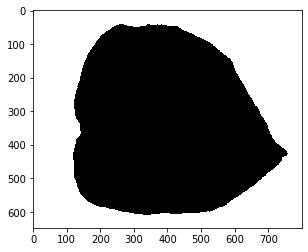

In [13]:
# Define the masked area, to isolate a selected area of interest and do something with that area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

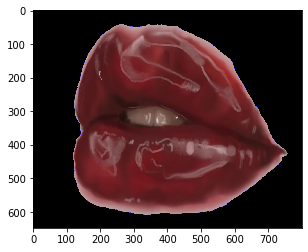

In [14]:
# Mask the image to let the lip show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0] # exclamation point means (NOT) so 0 means black

# Display it!
plt.imshow(masked_image)

### 5. Mask and add a background image

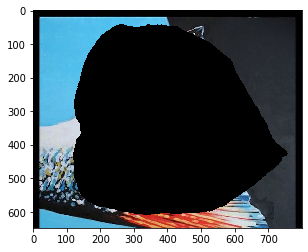

In [15]:
#Load in a background image, and convert it to RGB 
background_image = cv2.imread('/Users/fadhlihajar/Desktop/background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (648x800)
crop_background = background_image[0:648, 0:800]

# Mask the cropped background so that the lip area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

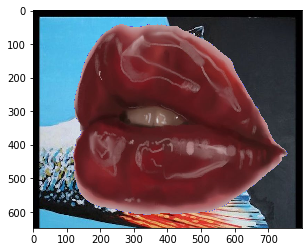

In [16]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)